<a href="https://colab.research.google.com/github/ji-hun-choi/algorithm-study/blob/main/1%EC%A3%BC%EC%B0%A8_Stack_Queue/%EB%8B%A4%EB%A6%AC%EB%A5%BC_%EC%A7%80%EB%82%98%EB%8A%94_%ED%8A%B8%EB%9F%AD(%ED%81%90).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 프로그래머스 다리를 지나는 트럭

[출저 프로그래머스 문제](https://programmers.co.kr/learn/courses/30/lessons/42583)

## 문제 설명

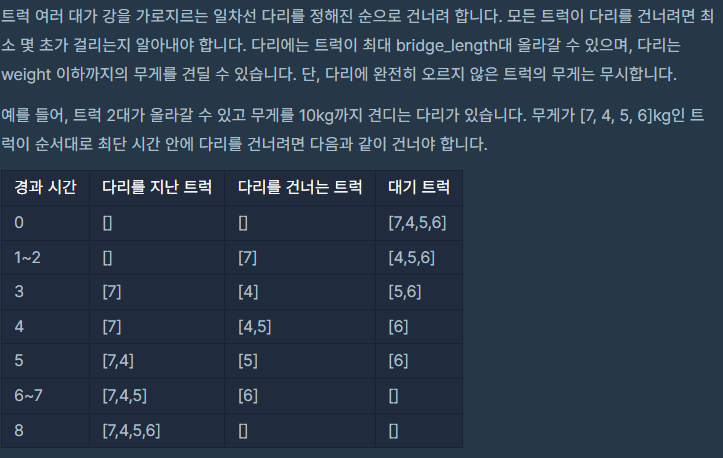

## 제한 사항

- bridge_length는 1 이상 10,000 이하입니다.
- weight는 1 이상 10,000 이하입니다.
- truck_weights의 길이는 1 이상 10,000 이하입니다.
- 모든 트럭의 무게는 1 이상 weight 이하입니다.

## 입출력 예


```
bridge_length	weight  	truck_weights	                 return
2	            10	       [7,4,5,6]	                     8
100	          100	      [10]	                          101
100	          100	      [10,10,10,10,10,10,10,10,10,10]   110
```

## 접근방법

- 형태로 보아 fifo 형식인 queue 알고리즘을 사용해야 될것 같다. list에서도 충분히 지원해서 list로 진행
- 대기트럭에서 다리를건너는트럭으로 옮겨주며 시간이 생성해야된다. pop(0)을 해주며 append()를 진행
- 다리가 가득차면 건너는트럭이 다 지날때 까지 못넣는다.
- 다리 길이 만큼 지나면 다리를건너는트럭을 제거, 시간 제거 * 제거를 위해 pop(0) 사용
- 여러 차량 무게가 다리를 지나갈수 있음. 시간도 여러개 생성
- 시간이 먼저 증가되어야 된다.

## 손코딩 - 첫 도안

```
def solution(bridge_length, weight, truck_weights):
    answer = 0
    t_w = truck_weights - 간단하게 표시
    t_ing, check_t = list(), list() - 건너는중 트럭, 시간체크 리스트 생성
    while t_w or t_ing : - 두개가 빈 리스트면 종료. 무한으로 돌아가면 len()으로 변경.
        for i in t_ing의 범위: - t_ing의 범위 만큼 1씩 증가.
            check_t[i] += 1 
        if len(t_ing) != 0 and check_t[0] == bridgh_length : - 시간 체크
            t_ing.pop(0)
            check_t.pop(0)
        if sum(t_ing) + t_w[0] <= weight: - 건너는중인 트럭과 기다리는트럭 더한 값의 무게 측정
            t_ing.append(t_w.pop(0)) - 첫번째 대기중 차량 추가
            check_t.append(0) - 시간 0으로 셋팅
        answer +=1 - 총타임
    return answer

```

## 1차시도

In [34]:
def solution(bridge_length, weight, truck_weights):
    answer = 0
    t_w = truck_weights
    t_ing, check_t = list(), list()
    while t_w or t_ing :
        for i in range(len(t_ing)):
            check_t[i] += 1
        if len(t_ing) != 0 and check_t[0] == bridge_length:
            t_ing.pop(0)
            check_t.pop(0)
        if sum(t_ing) + t_w[0] <= weight: # IndexError: list index out of range
            t_ing.append(t_w.pop(0))
            check_t.append(0)
        answer +=1
    return answer

In [35]:
solution(2, 10, [7,4,5,6])

IndexError: ignored

- list index out of range 가 나온다
- 비어있는 리스트를 찾아서 그런 것 같다. 조건 추가.

## 2차시도 (성공)

In [36]:
def solution(bridge_length, weight, truck_weights):
    answer = 0
    t_w = truck_weights
    t_ing, check_t = list(), list()
    while t_w or t_ing :
        for i in range(len(t_ing)):
            check_t[i] += 1
        if len(t_ing) != 0 and check_t[0] == bridge_length:
            t_ing.pop(0)
            check_t.pop(0)
        if t_w :                # t_w 가 들어 있는지 확인을 추가 했다.
            if sum(t_ing) + t_w[0] <= weight: 
                t_ing.append(t_w.pop(0))
                check_t.append(0)
        answer +=1
    return answer

In [40]:
li1 = [2, 100, 100]
li2 = [10, 100, 100]
li3 = [[7,4,5,6],[10],[10,10,10,10,10,10,10,10,10,10]]
for i in range(len(li1)):
    print(solution(li1[i], li2[i], li3[i]))

8
101
110
